In [164]:
import random

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Height of the node

class AVLTree:
    def insert(self, root, value, avl=True):
        # Perform the normal BST insertion
        if not root:
            return Node(value)
        elif value < root.value:
            root.left = self.insert(root.left, value, avl)
        else:
            root.right = self.insert(root.right, value, avl)

        # Update the height of this ancestor node
        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))
        if avl:
            # Get the balance factor
            balance = self.get_balance(root)

            # If the node becomes unbalanced, then there are 4 cases

            # Left Left Case
            if balance > 1 and value < root.left.value:
                return self.right_rotate(root)

            # Right Right Case
            if balance < -1 and value > root.right.value:
                return self.left_rotate(root)

            # Left Right Case
            if balance > 1 and value > root.left.value:
                root.left = self.left_rotate(root.left)
                return self.right_rotate(root)

            # Right Left Case
            if balance < -1 and value < root.right.value:
                root.right = self.right_rotate(root.right)
                return self.left_rotate(root)

        return root

    def left_rotate(self, z):
        y = z.right
        T2 = y.left

        # Perform rotation
        y.left = z
        z.right = T2

        # Update heights
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        # Return the new root
        return y

    def right_rotate(self, z):
        y = z.left
        T3 = y.right

        # Perform rotation
        y.right = z
        z.left = T3

        # Update heights
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        # Return the new root
        return y

    def get_height(self, node):
        if not node:
            return 0
        return node.height

    def get_balance(self, node):
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)

    def display_tree(self, node, prefix="", is_left=True):
        if node is not None:
            self.display_tree(node.right, prefix + ("│   " if is_left else "    "), False)
            print(prefix + ("└── " if is_left else "┌── ") + str(node.value))
            self.display_tree(node.left, prefix + ("    " if is_left else "│   "), True)
    
    def tree_order(self, node: Node, order_type: str, acc: list):
        if order_type=="level": return self.level_order(node)
        if node!=None:
            if order_type=="pre": acc+=[node.value]
            self.tree_order(node.left, order_type, acc)
            if order_type=="in": acc+=[node.value]
            self.tree_order(node.right, order_type, acc)
            if order_type=="post": acc+=[node.value]
            return acc
    
    def level_order(self, root: Node):
        acc = []
        queue = []
        queue.append(root)
        while(len(queue) > 0):
            acc.append(queue[0].value)
            node = queue.pop(0)
            if node.left is not None:
                queue.append(node.left)
            if node.right is not None:
                queue.append(node.right)
        return acc

avl_tree = AVLTree()

def generate_avl_tree(state: int = None):
    if state!=None: random.seed(state)
    values = random.sample(range(1, 100), 10)
    root = None
    for value in values:
        root = avl_tree.insert(root, value, True)
    return root
def generate_binary_tree(state: int = None):
    if state!=None: random.seed(state)
    values = random.sample(range(1, 100), 10)
    root = None
    for value in values:
        root = avl_tree.insert(root, value, False)
    return root

root = generate_avl_tree(0)
avl_tree.display_tree(root)
print(avl_tree.tree_order(root, "pre", []))
print(avl_tree.tree_order(root, "in", []))
print(avl_tree.tree_order(root, "post", []))
print(avl_tree.tree_order(root, "level", []))
root = generate_binary_tree(0)
avl_tree.display_tree(root)
print(avl_tree.tree_order(root, "pre", []))
print(avl_tree.tree_order(root, "in", []))
print(avl_tree.tree_order(root, "post", []))
print(avl_tree.tree_order(root, "level", []))

│       ┌── 98
│   ┌── 66
│   │   └── 63
│   │       └── 62
└── 54
    │       ┌── 52
    │   ┌── 50
    │   │   └── 39
    └── 34
        └── 6
[54, 34, 6, 50, 39, 52, 66, 63, 62, 98]
[6, 34, 39, 50, 52, 54, 62, 63, 66, 98]
[6, 39, 52, 50, 34, 62, 63, 98, 66, 54]
[54, 34, 66, 6, 50, 63, 98, 39, 52, 62]
│   ┌── 98
│   │   │   ┌── 66
│   │   │   │   └── 63
│   │   │   │       └── 62
│   │   └── 54
│   │       └── 52
└── 50
    │       ┌── 39
    │   ┌── 34
    └── 6
[50, 6, 34, 39, 98, 54, 52, 66, 63, 62]
[6, 34, 39, 50, 52, 54, 62, 63, 66, 98]
[39, 34, 6, 52, 62, 63, 66, 54, 98, 50]
[50, 6, 98, 34, 54, 39, 52, 66, 63, 62]


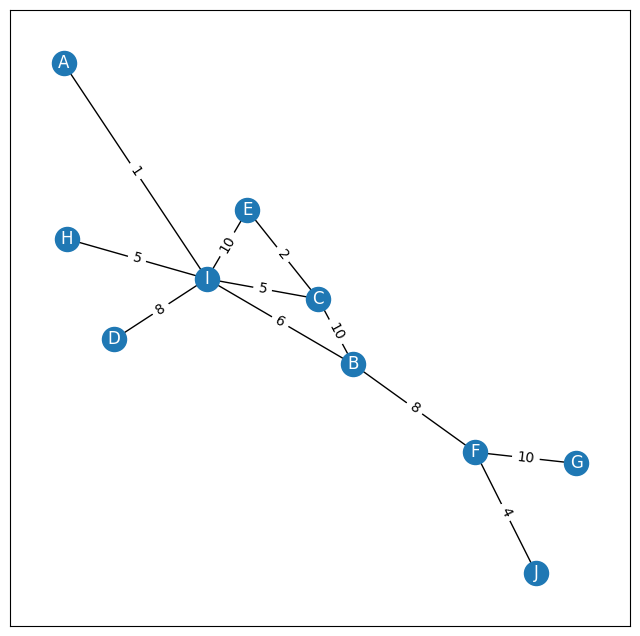

['A', 'I', 'B', 'C', 'D', 'E', 'H', 'F', 'G', 'J']

In [3]:
# graphs
import random
from functools import partial
from string import ascii_uppercase
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

class DisjointSet:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.parent[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.parent[rootX] = rootY
            else:
                self.parent[rootY] = rootX
                self.rank[rootX] += 1

def generate_random_graph(num_vertices=10, max_weight=10):
    # Create a list of vertices
    vertices = [i for i in range(1, num_vertices + 1)]
    vertice_used = [False for i in range(num_vertices)]
    # Generate random weighted edges, ensuring no duplicates or loops
    edges = set()
    edge_weights = {}  # Dictionary to store weights of edges
    while all(vertice_used)!=True:
        v1 = random.choice(vertices)
        v2 = random.choice(vertices)
        if v1 != v2:
            vertice_used[v1-1], vertice_used[v2-1] = True, True
            weight = random.randint(1, max_weight)  # Random weight between 1 and max_weight
            edges.add((v1, v2, weight))
            edges.add((v2, v1, weight))  # Add both directions for undirected graph
            edge_weights[(v1, v2)] = weight
            edge_weights[(v2, v1)] = weight

    # Create adjacency matrix (with weights)
    adjacency_matrix = [[0] * num_vertices for _ in range(num_vertices)]
    
    # Create adjacency list (with weights)
    adjacency_list = {v: [] for v in vertices}
    
    # Fill adjacency matrix and list with weights
    for v1, v2, _ in edges:
        weight = edge_weights[(v1, v2)]
        adjacency_matrix[v1-1][v2-1] = weight
        adjacency_list[v1].append((v2, weight))
    return vertices, edges, edge_weights, adjacency_matrix, adjacency_list

def kruskal_mst(vertices, edges, edge_weights):
    # Sort edges by weight
    sorted_edges = sorted(edges, key=lambda edge: edge_weights[(edge[0], edge[1])])

    # Initialize disjoint set for union-find
    ds = DisjointSet(len(vertices))
    
    mst = []  # To store the MST edges
    mst_weight = 0  # To store the total weight of the MST

    # Iterate over sorted edges and apply Kruskal's algorithm
    for v1, v2, _ in sorted_edges:
        # Since vertices are 1-indexed, we need to adjust them to 0-indexed for union-find
        if ds.find(v1 - 1) != ds.find(v2 - 1):
            ds.union(v1 - 1, v2 - 1)
            mst.append((v1, v2, edge_weights[(v1, v2)]))
            mst_weight += edge_weights[(v1, v2)]

    return mst, mst_weight

def vertice_num_to_alph(v: int):
    return ascii_uppercase[v-1]

def print_vertices(vertices, edges, edge_weights):
    print(" ".join([vertice_num_to_alph(v) for v in vertices]))
    print("\nEdges (with weights):")
    for v1, v2, _ in edges:
        if v1 < v2:
            print(f"{vertice_num_to_alph(v1)} ---({edge_weights[(v1, v2)]})--- {vertice_num_to_alph(v2)}")

def print_adjmat(vertices, adjacency_matrix):
    print("  "+" ".join([str.rjust(vertice_num_to_alph(v), 3) for v in vertices]))
    for v, row in zip(vertices, adjacency_matrix):
        print(" ".join([vertice_num_to_alph(v)]+[str.rjust(c, 3) for c in map(str, row)]))
    
def print_adjlist(adjacency_list):
    for vertex, neighbors in adjacency_list.items():
        neighbor_str = ", ".join([f"{vertice_num_to_alph(v)} (weight: {w})" for v, w in neighbors])
        print(f"{vertice_num_to_alph(vertex)}: {neighbor_str}")

def print_graph(vertices, edges):
    g = nx.Graph()
    g.add_weighted_edges_from(edges)
    plt.figure(figsize=(8,8))
    layout = nx.spring_layout(g)
    nx.draw_networkx_nodes(g, layout)
    nx.draw_networkx_edges(g, layout)
    nx.draw_networkx_labels(g, layout, {v: vertice_num_to_alph(v) for v in vertices}, font_color="white")
    nx.draw_networkx_edge_labels(g, layout, {(n1,n2): w for n1,n2,w in edges})
    plt.show()
def print_dfs(edges):
    g = nx.Graph()
    g.add_weighted_edges_from(edges)
    return [vertice_num_to_alph(c) for c in nx.dfs_preorder_nodes(g, 1, sort_neighbors=lambda n: sorted(n))]
def print_bfs(edges):
    g = nx.Graph()
    g.add_weighted_edges_from(edges)
    return ["A"]+[vertice_num_to_alph(i[1]) for i in nx.bfs_edges(g, 1, sort_neighbors=lambda n: sorted(n))]
# Run the function
vertices, edges, edge_weights, adjmat, adjlist = generate_random_graph()
mst, total_weight = kruskal_mst(vertices, edges, edge_weights)
# print_adjlist(adjlist)
# print()
# print_adjmat(vertices, adjmat)
print_graph(vertices, edges)
# print_graph(vertices, mst)
print_bfs(edges)

In [349]:
class NaiveHashTable:
    def __init__(self, size, load_factor_threshold=0.7, probing_method="linear", secondary_hash=None):
        self.size = size
        self.keys = [None] * size
        self.probing_method = probing_method  # "linear", "quadratic", or "double_hashing"
        self.secondary_hash = secondary_hash  # Function for double hashing, if needed
        self.load_factor_threshold = load_factor_threshold  # Threshold for resizing
        self.num_keys = 0  # Tracks the number of inserted keys

    def hash_function(self, key):
        return key % self.size

    def probe(self, key, i):
        """Probing function to determine next index based on probing method."""
        if self.probing_method == "linear":
            return (self.hash_function(key) + i) % self.size
        elif self.probing_method == "quadratic":
            return (self.hash_function(key) + i**2) % self.size
        elif self.probing_method == "double_hashing":
            if self.secondary_hash is None:
                raise ValueError("Secondary hash function required for double hashing")
            return (self.hash_function(key) + i * self.secondary_hash(key)) % self.size
        else:
            raise ValueError("Invalid probing method")

    def resize(self):
        """Resizes the hash table when load factor is exceeded."""
        old_keys = self.keys[:]
        self.size *= 2  # Double the size
        self.keys = [None] * self.size  # Create a new table
        self.num_keys = 0  # Reset the number of keys
        
        for key in old_keys:
            if key is not None:
                self.insert(key, resizing=True)  # Reinsert old keys into new table

    def insert(self, key, resizing=False):
        if not resizing and self.num_keys / self.size >= self.load_factor_threshold:
            print(f"Load factor exceeded: {self.num_keys / self.size}. Resizing...")
            self.resize()
        
        i = 0
        idx = self.probe(key, i)
        original_idx = idx
        
        # Handle collisions using probing
        while self.keys[idx] is not None:
            if self.keys[idx] == key:
                # Key already exists, no need to insert again
                return
            i += 1
            idx = self.probe(key, i)
            if idx == original_idx:
                raise Exception("Hash table is full")
        
        self.keys[idx] = key
        self.num_keys += 1

    def search(self, key):
        i = 0
        idx = self.probe(key, i)
        original_idx = idx
        
        # Probing to find the key
        while self.keys[idx] is not None:
            if self.keys[idx] == key:
                return True  # Key found
            i += 1
            idx = self.probe(key, i)
            if idx == original_idx:
                break
        
        return False  # Key not found

    def delete(self, key):
        i = 0
        idx = self.probe(key, i)
        original_idx = idx
        
        # Probing to find the key
        while self.keys[idx] is not None:
            if self.keys[idx] == key:
                self.keys[idx] = None
                self.num_keys -= 1
                return True  # Key deleted
            i += 1
            idx = self.probe(key, i)
            if idx == original_idx:
                break
        
        return False  # Key not found
    def __repr__(self) -> str:
        return "".join(["["+str.rjust(str(k) if k!=None else "    ", 4)+"]" for k in self.keys])
def secondary_hash(key):
    return 7 - (key % 7)

# ht = NaiveHashTable(5, load_factor_threshold=0.7, probing_method="linear")
ht = NaiveHashTable(10, load_factor_threshold=0.7, probing_method="quadratic")
# ht = NaiveHashTable(5, load_factor_threshold=0.7, probing_method="double_hashing", secondary_hash=secondary_hash)
ht.insert(5)
ht.insert(15)
ht.insert(25)
ht.insert(35)
ht.insert(45)
print(ht)
ht.delete(15)
print(ht)

[    ][  45][    ][    ][  35][   5][  15][    ][    ][  25]
[    ][  45][    ][    ][  35][   5][    ][    ][    ][  25]


In [193]:
def quicksort(arr, low, high):
    if low < high:
        # Partition the array and get the pivot index
        pivot_index = partition(arr, low, high)
        
        # Print the current state of the array
        print(f"After partitioning with pivot {arr[pivot_index]}: {arr}")
        
        # Recursively sort the elements before and after partition
        quicksort(arr, low, pivot_index - 1)
        quicksort(arr, pivot_index + 1, high)

def partition(arr, low, high):
    pivot = arr[low]  # Choose the first element as the pivot
    i = low + 1  # Pointer for the greater element
    
    for j in range(low + 1, high + 1):
        # If the current element is smaller than or equal to the pivot
        if arr[j] < pivot:
            arr[i], arr[j] = arr[j], arr[i]  # Swap
            i += 1  # Increment the pointer
    # Swap the pivot element with the element at i - 1
    arr[low], arr[i - 1] = arr[i - 1], arr[low]
    return i - 1  # Return the pivot index

In [235]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2  # Finding the mid of the array
        left_half = arr[:mid]  # Dividing the array elements into 2 halves
        right_half = arr[mid:]

        # Recursively sort both halves
        merge_sort(left_half)
        merge_sort(right_half)

        # Merging the sorted halves
        merge(arr, left_half, right_half)

def merge(arr, left_half, right_half):
    i = j = k = 0

    # Merging the two halves
    while i < len(left_half) and j < len(right_half):
        if left_half[i] < right_half[j]:
            arr[k] = left_half[i]
            i += 1
        else:
            arr[k] = right_half[j]
            j += 1
        k += 1

    # Checking if any element was left
    while i < len(left_half):
        arr[k] = left_half[i]
        i += 1
        k += 1

    while j < len(right_half):
        arr[k] = right_half[j]
        j += 1
        k += 1

    # Print the current state of the array after merging
    print(f"Merged: {arr[:k]}")

In [433]:
class BinaryHeap:
    def __init__(self):
        self.heap = []

    def insert(self, value):
        self.heap.append(value)
        self._heapify_up(len(self.heap) - 1)

    def extract_max(self):
        if len(self.heap) == 1:
            return self.heap.pop()
        root = self.heap[0]
        self.heap[0] = self.heap.pop()
        self._heapify_down(0)
        return root

    def _heapify_up(self, index):
        parent_index = (index - 1) // 2
        if index > 0 and self.heap[index] > self.heap[parent_index]:
            # Swap and continue heapifying up
            self.heap[index], self.heap[parent_index] = self.heap[parent_index], self.heap[index]
            print(f"Heapify up: {self.heap}")
            self._heapify_up(parent_index)

    def _heapify_down(self, index):
        left_child = 2 * index + 1
        right_child = 2 * index + 2
        largest = index

        if left_child < len(self.heap) and self.heap[left_child] > self.heap[largest]:
            largest = left_child

        if right_child < len(self.heap) and self.heap[right_child] > self.heap[largest]:
            largest = right_child

        if largest != index:
            # Swap and continue heapifying down
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            print(f"Heapify down: {self.heap}")
            self._heapify_down(largest)

    def build_max_heap(self, arr):
        self.heap = arr[:]
        start_index = len(arr) // 2 - 1
        for i in range(start_index, -1, -1):
            self._heapify_down(i)
            print(f"Building max heap: {self.heap}")

    def heapsort(self, arr):
        self.build_max_heap(arr)
        sorted_arr = []
        for _ in range(len(arr)):
            sorted_arr.append(self.extract_max())
            print(f"Extract max and sort: {sorted_arr} | Remaining heap: {self.heap}")
        return sorted_arr


In [445]:
arr = [50, 2, 90, 37, 4, 48, 78, 87, 21, 58]
print("Initial array:", arr)

heap = BinaryHeap()
heap.build_max_heap(arr)
# sorted_array = heap.heapsort(arr)

Initial array: [50, 2, 90, 37, 4, 48, 78, 87, 21, 58]
Heapify down: [50, 2, 90, 37, 58, 48, 78, 87, 21, 4]
Building max heap: [50, 2, 90, 37, 58, 48, 78, 87, 21, 4]
Heapify down: [50, 2, 90, 87, 58, 48, 78, 37, 21, 4]
Building max heap: [50, 2, 90, 87, 58, 48, 78, 37, 21, 4]
Building max heap: [50, 2, 90, 87, 58, 48, 78, 37, 21, 4]
Heapify down: [50, 87, 90, 2, 58, 48, 78, 37, 21, 4]
Heapify down: [50, 87, 90, 37, 58, 48, 78, 2, 21, 4]
Building max heap: [50, 87, 90, 37, 58, 48, 78, 2, 21, 4]
Heapify down: [90, 87, 50, 37, 58, 48, 78, 2, 21, 4]
Heapify down: [90, 87, 78, 37, 58, 48, 50, 2, 21, 4]
Building max heap: [90, 87, 78, 37, 58, 48, 50, 2, 21, 4]


In [446]:
heap.extract_max()

Heapify down: [87, 4, 78, 37, 58, 48, 50, 2, 21]
Heapify down: [87, 58, 78, 37, 4, 48, 50, 2, 21]


90

In [379]:
# Give the X order traversal of this tree
root = generate_binary_tree()
avl_tree.display_tree(root)

│   ┌── 79
│   │   │   ┌── 73
│   │   │   │   └── 56
│   │   └── 55
│   │       │       ┌── 39
│   │       │   ┌── 31
│   │       └── 19
└── 16
    │   ┌── 15
    └── 10


In [380]:
# ans
print(avl_tree.tree_order(root, "pre", []))
print(avl_tree.tree_order(root, "in", []))
print(avl_tree.tree_order(root, "post", []))
print(avl_tree.tree_order(root, "level", []))

[16, 10, 15, 79, 55, 19, 31, 39, 73, 56]
[10, 15, 16, 19, 31, 39, 55, 56, 73, 79]
[15, 10, 39, 31, 19, 56, 73, 55, 79, 16]
[16, 10, 79, 15, 55, 19, 73, 31, 56, 39]


In [283]:
# Reconstruct this tree from in order+post order traversal
c = "post" if random.choice([1,2])==1 else "pre"
root = generate_binary_tree()
print("in order: "+str(avl_tree.tree_order(root, "in", [])))
print(c+"order: "+str(avl_tree.tree_order(root, c, [])))

in order: [17, 19, 24, 29, 31, 32, 41, 49, 66, 97]
postorder: [17, 24, 31, 32, 41, 29, 19, 97, 66, 49]


In [284]:
# ans
avl_tree.display_tree(root)

│       ┌── 97
│   ┌── 66
└── 49
    │       ┌── 41
    │       │   └── 32
    │       │       └── 31
    │   ┌── 29
    │   │   └── 24
    └── 19
        └── 17


In [289]:
# draw me the rotations of avl tree when insert some elements or delete.
seed = random.randrange(1,1000000)
root = generate_binary_tree(seed)
avl_tree.display_tree(root)

│               ┌── 98
│           ┌── 97
│       ┌── 92
│   ┌── 79
└── 67
    │   ┌── 50
    │   │   └── 46
    └── 41
        └── 35
            └── 22


In [290]:
# answer
root = generate_avl_tree(seed)
avl_tree.display_tree(root)

│           ┌── 98
│       ┌── 97
│       │   └── 92
│   ┌── 79
│   │   └── 67
└── 50
    │   ┌── 46
    └── 41
        └── 35
            └── 22


In [452]:
# Fill in hash table
from sympy import prime
from textwrap import wrap
pmethod = random.choice(["linear", "quadratic", 'double_hashing'])
PRIME_SIZE = 7
hash1 = prime(random.randrange(1, PRIME_SIZE+1))
hash2 = prime(random.randrange(1, PRIME_SIZE+1))
while hash1<=6 and hash2>=hash1:
    hash1 = prime(random.randrange(1, PRIME_SIZE+1))
    hash2 = prime(random.randrange(1, PRIME_SIZE+1))
hash2_func = lambda key: hash2 - (key % hash2)
ht = NaiveHashTable(hash1, load_factor_threshold=1, probing_method=pmethod, secondary_hash=hash2_func)
values = random.sample(range(1, 100), 10)
for v in values:
    ht.insert(v)
for l in wrap("Fill in a hash table of size "+str(hash1)+" with values "+str(values)+" using "+ pmethod + " and secondary hash "+str(hash2), 64):
    print(l)

Fill in a hash table of size 17 with values [57, 14, 19, 60, 38,
88, 98, 93, 12, 21] using linear and secondary hash 2


In [453]:
# Answer
ht

[    ][    ][  19][  88][  38][  21][  57][    ][  93][  60][    ][    ][  12][  98][  14][    ][    ]

In [ ]:
# Fill in a hash table of size 17 with values [78, 61, 16, 7, 31, 59, 36, 87, 92, 84] using double_hashing and secondary hash h2(k)=7-k%7


In [384]:
# Draw Graph shape from adjmat/adjlist
vertices, edges, edge_weights, adjmat, adjlist = generate_random_graph()
print_adjlist(adjlist)
print_adjmat(vertices, adjmat)

A: J (weight: 9), D (weight: 2)
B: F (weight: 7), G (weight: 6), I (weight: 9), J (weight: 10), G (weight: 6), C (weight: 10)
C: B (weight: 10)
D: A (weight: 2), H (weight: 4)
E: G (weight: 7)
F: B (weight: 7)
G: B (weight: 6), E (weight: 7), B (weight: 6)
H: D (weight: 4)
I: B (weight: 9)
J: A (weight: 9), B (weight: 10)
    A   B   C   D   E   F   G   H   I   J
A   0   0   0   2   0   0   0   0   0   9
B   0   0  10   0   0   7   6   0   9  10
C   0  10   0   0   0   0   0   0   0   0
D   2   0   0   0   0   0   0   4   0   0
E   0   0   0   0   0   0   7   0   0   0
F   0   7   0   0   0   0   0   0   0   0
G   0   6   0   0   7   0   0   0   0   0
H   0   0   0   4   0   0   0   0   0   0
I   0   9   0   0   0   0   0   0   0   0
J   9  10   0   0   0   0   0   0   0   0


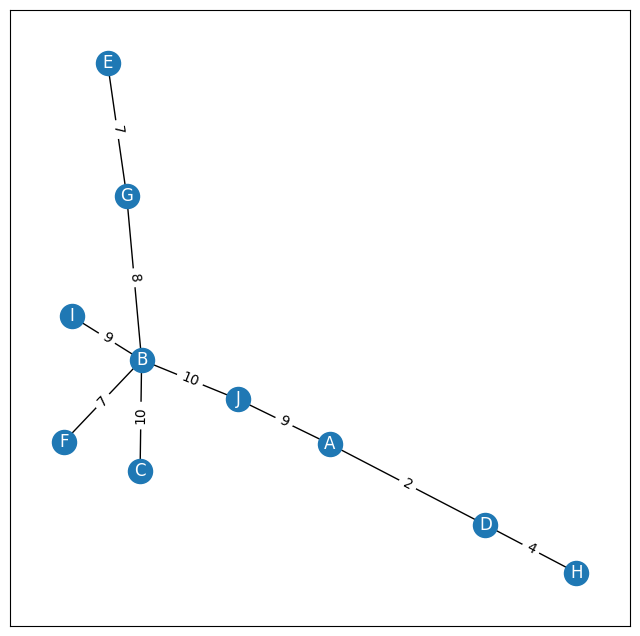

In [385]:
# answer
print_graph(vertices, edges)

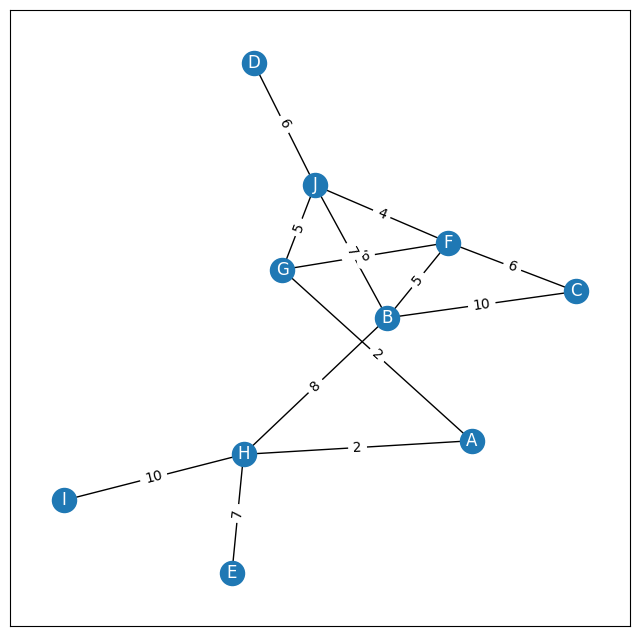

In [404]:
# Graph BFS/DFS
vertices, edges, edge_weights, adjmat, adjlist = generate_random_graph()
print_graph(vertices, edges)

In [405]:
# ans
print(print_dfs(edges))
print(print_bfs(edges))

['A', 'G', 'F', 'B', 'C', 'H', 'E', 'I', 'J', 'D']
['A', 'G', 'H', 'F', 'J', 'B', 'E', 'I', 'C', 'D']


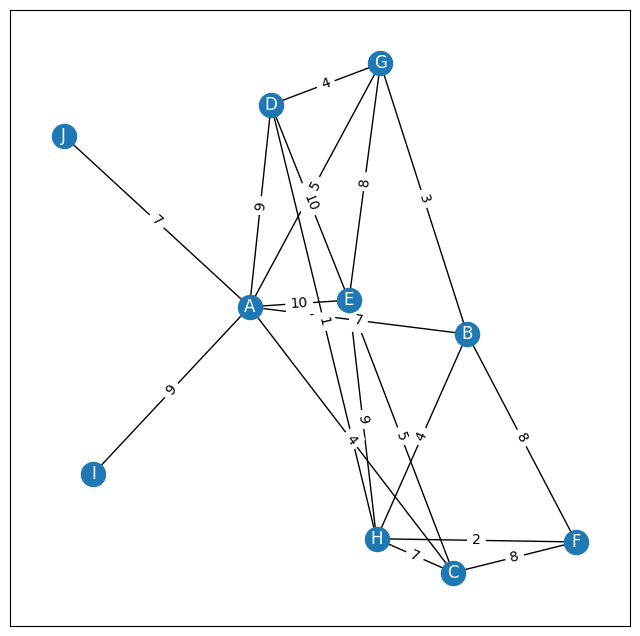

In [410]:
# Kruskal/Prim
vertices, edges, edge_weights, adjmat, adjlist = generate_random_graph()
mst, total_weight = kruskal_mst(vertices, edges, edge_weights)
print_graph(vertices, edges)

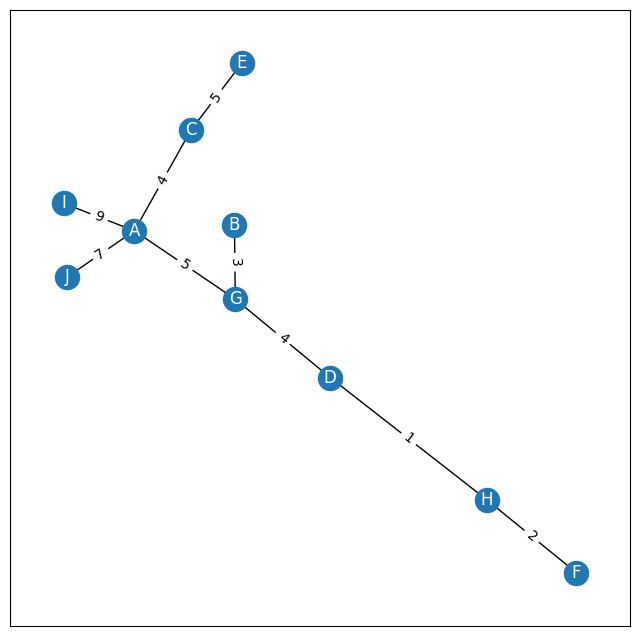

In [432]:
# answer
print_graph(vertices, mst)

In [451]:
# Draw sort of this array
array = random.sample(range(1, 100), 10)
alg = random.choice(['merge', 'quick'])
"Illustrate the " + str(alg) + " sort process on this array: "+str(array)

'Illustrate the quick sort process on this array: [96, 66, 82, 14, 70, 73, 74, 69, 88, 56]'

In [431]:
# ans
match (alg):
    case "merge": merge_sort(array)
    case "quick": quicksort(array, 0, len(array) - 1)


After partitioning with pivot 34: [30, 16, 8, 18, 31, 13, 34, 36, 40, 96]
After partitioning with pivot 30: [13, 16, 8, 18, 30, 31, 34, 36, 40, 96]
After partitioning with pivot 13: [8, 13, 16, 18, 30, 31, 34, 36, 40, 96]
After partitioning with pivot 16: [8, 13, 16, 18, 30, 31, 34, 36, 40, 96]
After partitioning with pivot 36: [8, 13, 16, 18, 30, 31, 34, 36, 40, 96]
After partitioning with pivot 40: [8, 13, 16, 18, 30, 31, 34, 36, 40, 96]
